In [53]:
# Import necessary libraries
from sklearn.linear_model import SGDRegressor  # Stochastic Gradient Descent Regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Advanced visualizations
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets
from sklearn.preprocessing import MinMaxScaler

In [54]:
#Load the data
training_data = pd.read_csv('/workspaces/bakery_sales_prediction/0_DataPreparation/00_data/Trainingsdaten_long.csv')

training_data

,Datum,Umsatz,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,Temp_Very_Cold,Temp_Cold,...,VPI,Number_of_ships,Ship,Heimspiel,Feiertag,is_holiday,Weihnachtsmarkt,Markt,Ostertag,Silvester
0,2013-07-01,148.828353,1,0,0,0,0,0,0,0,...,0.068,0.0,0,0,0,1,0,0,0,0
1,2013-07-02,159.793757,1,0,0,0,0,0,0,0,...,0.068,0.0,0,0,0,1,0,0,0,0
2,2013-07-03,111.885594,1,0,0,0,0,0,0,0,...,0.068,0.0,0,0,0,1,0,0,0,0
3,2013-07-04,168.864941,1,0,0,0,0,0,0,0,...,0.068,0.0,0,0,0,1,0,0,0,0
4,2013-07-05,171.280754,1,0,0,0,0,0,0,0,...,0.068,1.0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7488,2016-12-22,54.322960,0,0,0,0,0,1,0,1,...,0.458,0.0,0,0,0,0,1,0,0,0
7489,2016-12-23,133.499200,0,0,0,0,0,1,0,1,...,0.458,0.0,0,0,0,1,1,0,0,0
7490,2016-12-24,39.577538,0,0,0,0,0,1,0,1,...,0.458,0.0,0,0,0,1,0,0,0,0
7491,2016-12-27,48.890718,0,0,0,0,0,1,0,1,...,0.458,0.0,0,0,0,1,0,0,0,0


In [55]:
# Daten nur der Warengruppe 6 extrahieren
warengruppe5_df = training_data[training_data['Warengruppe_6'] == 1]
training_data = warengruppe5_df
training_data



,Datum,Umsatz,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,Temp_Very_Cold,Temp_Cold,...,VPI,Number_of_ships,Ship,Heimspiel,Feiertag,is_holiday,Weihnachtsmarkt,Markt,Ostertag,Silvester
7257,2013-10-24,41.813038,0,0,0,0,0,1,0,0,...,0.034,0.0,0,0,0,0,0,0,0,0
7258,2013-10-25,16.410876,0,0,0,0,0,1,0,0,...,0.034,0.0,0,0,0,0,0,0,0,0
7259,2013-10-26,18.574458,0,0,0,0,0,1,0,0,...,0.034,0.0,0,0,0,0,0,0,0,0
7260,2013-10-27,24.640084,0,0,0,0,0,1,0,0,...,0.034,0.0,0,0,0,0,0,0,0,0
7261,2013-10-29,43.515366,0,0,0,0,0,1,0,0,...,0.034,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7488,2016-12-22,54.322960,0,0,0,0,0,1,0,1,...,0.458,0.0,0,0,0,0,1,0,0,0
7489,2016-12-23,133.499200,0,0,0,0,0,1,0,1,...,0.458,0.0,0,0,0,1,1,0,0,0
7490,2016-12-24,39.577538,0,0,0,0,0,1,0,1,...,0.458,0.0,0,0,0,1,0,0,0,0
7491,2016-12-27,48.890718,0,0,0,0,0,1,0,1,...,0.458,0.0,0,0,0,1,0,0,0,0


In [56]:
# Validierungsdaten laden
validation_data = pd.read_csv('/workspaces/bakery_sales_prediction/0_DataPreparation/00_data/Validierungsdaten_long.csv')

validation_data

,Datum,Umsatz,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,Temp_Very_Cold,Temp_Cold,...,VPI,Number_of_ships,Ship,Heimspiel,Feiertag,is_holiday,Weihnachtsmarkt,Markt,Ostertag,Silvester
0,2017-08-01,166.135486,1,0,0,0,0,0,0,0,...,0.695,0.0,0,0,0,1,0,0,0,0
1,2017-08-02,155.022099,1,0,0,0,0,0,0,0,...,0.695,0.0,0,0,0,1,0,0,0,0
2,2017-08-03,159.575340,1,0,0,0,0,0,0,0,...,0.695,0.0,0,0,0,1,0,0,0,0
3,2017-08-04,161.585239,1,0,0,0,0,0,0,0,...,0.695,0.0,0,0,0,1,0,0,0,0
4,2017-08-05,198.088094,1,0,0,0,0,0,0,0,...,0.695,0.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,2017-12-21,87.471228,0,0,0,0,0,1,0,1,...,0.695,0.0,0,0,0,1,1,0,0,0
1837,2017-12-22,71.911652,0,0,0,0,0,1,0,1,...,0.695,0.0,0,0,0,1,1,0,0,0
1838,2017-12-23,84.062223,0,0,0,0,0,1,0,1,...,0.695,0.0,0,0,0,1,1,0,0,0
1839,2017-12-24,60.981969,0,0,0,0,0,1,0,1,...,0.695,0.0,0,0,0,1,0,0,0,0


In [57]:
warengruppe6_df = validation_data[validation_data['Warengruppe_6'] == 1]
validation_data = warengruppe6_df
validation_data

,Datum,Umsatz,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,Temp_Very_Cold,Temp_Cold,...,VPI,Number_of_ships,Ship,Heimspiel,Feiertag,is_holiday,Weihnachtsmarkt,Markt,Ostertag,Silvester
1785,2017-10-30,64.637240,0,0,0,0,0,1,0,1,...,0.678,0.0,0,0,0,0,0,0,0,0
1786,2017-11-01,23.868179,0,0,0,0,0,1,0,0,...,0.610,0.0,0,0,0,0,0,0,0,0
1787,2017-11-02,44.029529,0,0,0,0,0,1,0,0,...,0.610,0.0,0,0,0,0,0,0,0,0
1788,2017-11-03,37.826803,0,0,0,0,0,1,0,1,...,0.610,0.0,0,0,0,0,0,0,0,0
1789,2017-11-04,36.856892,0,0,0,0,0,1,0,0,...,0.610,0.0,0,0,0,0,0,0,0,0
1790,2017-11-05,28.382096,0,0,0,0,0,1,0,1,...,0.610,1.0,1,1,0,0,0,0,0,0
1791,2017-11-06,56.817398,0,0,0,0,0,1,0,1,...,0.610,1.0,1,0,0,0,0,0,0,0
1792,2017-11-07,39.725376,0,0,0,0,0,1,0,1,...,0.610,1.0,1,0,0,0,0,0,0,0
1793,2017-11-08,32.973247,0,0,0,0,0,1,0,1,...,0.610,2.0,1,0,0,0,0,0,0,0
1794,2017-11-09,44.782409,0,0,0,0,0,1,0,1,...,0.610,0.0,0,0,0,0,0,0,0,0


In [58]:
# Select features and target variable

features = features = ['Warengruppe_1', 'Warengruppe_2', 'Warengruppe_3', 'Warengruppe_4', 'Warengruppe_5', 'Warengruppe_6', 
            'Temp_Very_Cold', 'Temp_Cold', 'Temp_Mild', 'Temp_Warm', 'Temp_Hot', 
            #'Cloud_Clear', 'Cloud_Partly_Cloudy', 'Cloud_Cloudy', 'Wind_Light', 'Wind_Moderate', 
            'Wind_Strong', 
            'Weather_Good', 'Weather_Light_Issues', 'Weather_Moderate', 'Weather_Severe', 
            'KielerWoche', 
            'Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag', 
            'VPI', 
            'Number_of_ships', 'Ship', 
            'Heimspiel', 
            'Feiertag', 
            #'is_holiday', 
            'Weihnachtsmarkt', 
            'Markt'
            ]
X_train = training_data[features]
y_train = training_data['Umsatz']  # Target variable: Umsatz

X_test = validation_data[features]
y_test = validation_data['Umsatz']

In [59]:
# Train a Stochastic Gradient Descent (SGD) Regressor
# Parameters:
# - max_iter: Maximum number of iterations for training.
# - learning_rate: Type of learning rate schedule ('invscaling' decreases learning rate over time).
# - eta0: Initial learning rate.
sgd_model = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.03)
sgd_model.fit(X_train, y_train)

SGDRegressor(eta0=0.03)

In [60]:
# Make predictions on the test set
sgd_predictions = sgd_model.predict(X_test)
print("Predictions for test data:", sgd_predictions[:5])  # Display first 5 predictions

Predictions for test data: [44.04522545 40.69311564 47.58961572 51.76221493 53.39653769]


In [61]:
# Calculate error metrics
mae = mean_absolute_error(y_test, sgd_predictions)  # Mean Absolute Error
mse = mean_squared_error(y_test, sgd_predictions)  # Mean Squared Error
mape = (abs((y_test - sgd_predictions) / y_test).mean()) * 100  # Mean Absolute Percentage Error

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 16.90
Mean Squared Error (MSE): 419.90
Mean Absolute Percentage Error (MAPE): 40.36%


/tmp/ipykernel_81871/1857845646.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")


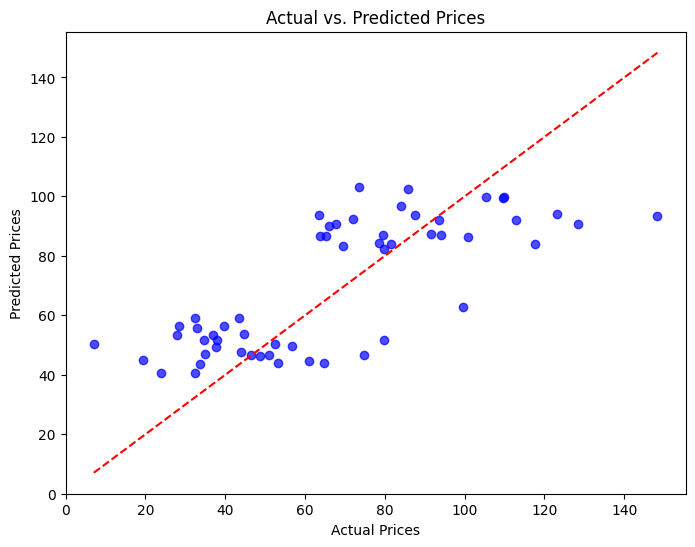

In [62]:
# Plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, sgd_predictions, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

In [63]:
#Load the test-data

test_data = pd.read_csv('/workspaces/bakery_sales_prediction/0_DataPreparation/00_data/Testdaten.csv')
# test_data['VPI'] = vpi_scaler.transform(test_data[['VPI']])
test_data



,id,Datum,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,Temp_Very_Cold,Temp_Cold,...,VPI,Number_of_ships,Ship,Heimspiel,Feiertag,is_holiday,Weihnachtsmarkt,Markt,Ostertag,Silvester
0,1808011,2018-08-01,1,0,0,0,0,0,0,0,...,NaN,0.0,0,0,0,1,0,0,0,0
1,1808021,2018-08-02,1,0,0,0,0,0,0,0,...,NaN,0.0,0,0,0,1,0,0,0,0
2,1808031,2018-08-03,1,0,0,0,0,0,0,0,...,NaN,0.0,0,0,0,1,0,0,0,0
3,1808041,2018-08-04,1,0,0,0,0,0,0,0,...,NaN,1.0,1,0,0,1,0,0,0,0
4,1808051,2018-08-05,1,0,0,0,0,0,0,0,...,NaN,0.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,1812226,2018-12-22,0,0,0,0,0,1,0,1,...,NaN,0.0,0,0,0,1,1,0,0,0
1826,1812236,2018-12-23,0,0,0,0,0,1,0,1,...,NaN,0.0,0,1,0,1,1,0,0,0
1827,1812246,2018-12-24,0,0,0,0,0,1,0,1,...,NaN,0.0,0,0,0,1,0,0,0,0
1828,1812276,2018-12-27,0,0,0,0,0,1,0,1,...,NaN,0.0,0,0,0,1,0,0,0,0


In [64]:
warengruppe6_df = test_data[test_data['Warengruppe_6'] == 1]
test_data = warengruppe6_df
test_data

,id,Datum,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,Temp_Very_Cold,Temp_Cold,...,VPI,Number_of_ships,Ship,Heimspiel,Feiertag,is_holiday,Weihnachtsmarkt,Markt,Ostertag,Silvester
1774,1811016,2018-11-01,0,0,0,0,0,1,0,0,...,NaN,0.0,0,0,0,0,0,0,0,0
1775,1811026,2018-11-02,0,0,0,0,0,1,0,0,...,NaN,0.0,0,0,0,0,0,0,0,0
1776,1811036,2018-11-03,0,0,0,0,0,1,0,1,...,NaN,0.0,0,1,0,0,0,0,0,0
1777,1811046,2018-11-04,0,0,0,0,0,1,0,1,...,NaN,0.0,0,0,0,0,0,0,0,0
1778,1811056,2018-11-05,0,0,0,0,0,1,0,0,...,NaN,1.0,1,0,0,0,0,0,0,0
1779,1811066,2018-11-06,0,0,0,0,0,1,0,1,...,NaN,1.0,1,0,0,0,0,0,0,0
1780,1811076,2018-11-07,0,0,0,0,0,1,0,0,...,NaN,2.0,1,0,0,0,0,0,0,0
1781,1811086,2018-11-08,0,0,0,0,0,1,0,0,...,NaN,5.0,1,0,0,0,0,0,0,0
1782,1811096,2018-11-09,0,0,0,0,0,1,0,1,...,NaN,1.0,1,0,0,0,0,0,0,0
1783,1811106,2018-11-10,0,0,0,0,0,1,0,0,...,NaN,0.0,0,0,0,0,0,0,0,0


In [65]:
test_data_copy = test_data[features]

# Make predictions on the test set

sgd_predictions = sgd_model.predict(test_data_copy)
print("Predictions for test data:", sgd_predictions[:5])  # Display first 5 predictions

ValueError: Input X contains NaN.
SGDRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

*Jetzt müssen noch die Predictions in die richtigen Reihen der sample_submission.csv gemerged werden*

In [ ]:
# Erstellt einen DataFrame aus den Vorhersagen des SGD-Modells
pred = pd.DataFrame(sgd_predictions)
pred


,0
0,42.872907
1,42.701243
2,59.070678
3,43.027467
4,39.539140
5,52.022979
6,45.118946
7,60.373991
8,53.642438
9,50.332643


In [ ]:
# let's merge predictions with the 'id' column:
predictions_df = pd.DataFrame({
    'id': test_data['id'].values,
    'Umsatz': pred[0].values
}).reset_index(drop=True)

predictions_df

,id,Umsatz
0,1811016,42.872907
1,1811026,42.701243
2,1811036,59.070678
3,1811046,43.027467
4,1811056,39.539140
5,1811066,52.022979
6,1811076,45.118946
7,1811086,60.373991
8,1811096,53.642438
9,1811106,50.332643


In [ ]:

# Speichert den DataFrame als CSV-Datei für die Kaggle-Submission
# index=False verhindert, dass eine zusätzliche Indexspalte geschrieben wird
predictions_df.to_csv('saisonbrot_sample_submission.csv', index=False)